|--- | Revenir à la [page déroulement](README.ipynb) | ---|
|-------------|---|---|
| Notebooks | [OCT0 autoeval](../tp/OCT/OCT0_auto_eval.ipynb), [OCT1-intro](../tp/OCT/OCT1_intro.ipynb) et [OCT2-suite](../tp/OCT/OCT2_intro.ipynb)||

---
# TD octave
---

|Quand  |    Quoi                      |   Lien                          |
|-------|------------------------------|---------------------------------|
| Prépa. maison |     Installer Jupyter/Octave (INSA ou perso)| [Instructions d'installation](https://github.com/balaise31/Signal/blob/main/installation/README.md) |
| Prépa. maison | Bases  langage Matlab/Octave | [autoformation OCT0](../tp/OCT/OCT0_auto_eval.ipynb) jusqu'au test de récap |
| TD Machine 1  | Bases langage + IDE     | [1 Bases](TD_octave.ipynb#1-Bases) Exos 1,2,3 du [sujet moodle](https://moodle.insa-toulouse.fr/mod/resource/view.php?id=24759) | 
| Prépa. maison | Calcul signaux | [autoformation OCT0](../tp/OCT/OCT0_auto_eval.ipynb) la fin  |
| TD Machine 2  | Calcul signaux     | [2 Calculs](TD_octave.ipynb#2-Calculs) Exos 3(fin), 4 du [sujet moodle](https://moodle.insa-toulouse.fr/mod/resource/view.php?id=24759)| 
| Test maison | Vérification du script 4 sur un calcul | [3 Evaluation individuelle moodle](TD_octave.ipynb#3-Evaluation) |



## 1 Bases
---
Les 3 premiers exercices (6 premières pages) du [sujet moodle](https://moodle.insa-toulouse.fr/mod/resource/view.php?id=24759) se font avec l'**IDE d'Octave**.

> vous pouvez au choix :
>  - poursuivre l'[autoformation OCT0](../tp/OCT/OCT0_auto_eval.ipynb) sur notebook jusqu'au test de récapitulation (affichage d'un signal)
>  - ou faire les exos 1,2,3 du sujet pdf moodle avec l'IDE Octave(Linux) / Matlab(Windows)


Octave est gratuit et vous pouvez le télécharger et l'installer chez vous en suivant ces [instructions pour installer octave](https://github.com/balaise31/Signal/blob/master/installation/README.md#Installer-Octave)

 > Sous Linux, lancez octave avec **Menu->Education->Gnu octave** ou bien `octave --gui` dans un terminal  
 > Sous windows lancez matlab du menu démarer


## 2 Calculs
---

Sur l'IDE Octave(Linux) ou Matlab(Windows) terminer l'exercice 4 du [sujet moodle](https://moodle.insa-toulouse.fr/mod/resource/view.php?id=24759) 

Il faut faire un script qui approche numériquement la valeur d'une intégrale par la méthode de Rieman d'une fonction quelconque.  

Vous avez 3 techniques pour calculer cette intégrale :


**vous devez avoir un script capable de calculer la valeur moyenne de n'importe quelle fonction**


## 3 Evaluation
---
Après les deux séances, il faudra aller sur le [test sur moodle](https://moodle.insa-toulouse.fr/mod/quiz/view.php?id=24772) faire le test.

Cela consistera à :
 - donner les noms du binôme
 - prendre connaissance de la valeur moyenne à calculer (**formule individuelle tirée au hasard par moodle** comme, par exemple, $\int\limits_{t=0}^{\pi}tcos(2t)dt$)
 - modifier votre script .m pour qu'il calcule cette intégrale,
 - renseigner la valeur moyenne calculée par le script
 - déposer le script sur le site.




## 4 Méthodes d'intégration
---


L'aire sous la courbe est ainsi approchée :

<img title="intégrale de Rieman" alt="Alt text" src="./images/integrale_Riemann.png" width="400">

Ne pas confondre 
 * une intégrale qui est **un nombre scalaire** (lorsqu'elle converge) :   
$\int\limits_a^b f(t). dt = F(a) - F(b) = \lim\limits_{dx\to 0}\sum\limits_{k=0}^N f\left(k.dx\right).dx$    
  **C'est un nombre !** qui est la surface sous la courbe de $a$ à $b$ fixés et connus.
 * la primitive $F$ d'une fonction $f$ qui dépend d'une borne   
   $F : a \mapsto \int\limits_{0}^{a}f(t).dt$  
   **C'est donc une fonction !** qui pour un $a$ donné renvoie la surface sous la courbe de 0 à $a$

  
Nous cherchons ici à calculer une intégrale et donc un nombre.

Le but est maintenant de calculer $\sum\limits_{k=0}^N f\left(k.dx\right).dx$ à l'aide de vos vecteurs et variables matlab.

Faites le lien entre cette formule, son schéma, ses noms de variables,  et les variables de votre scripts :
| $f \iff $ | `f` ou `f_de_t` ou `f(t)`|
|-----------|----------------|
| $dx$      | `tmin` ou `tmax`ou `Te`|
| $a$       | `tmin` ou `tmax`ou `Te`|
| $b$       | `tmin` ou `tmax`ou `Te`|
| $x$       | `t` ou `f(t)`|
| $N$       | `length(Te)` ou `length(t)` | 

Il y a **3 méthodes pour faire une somme de signal** en matlab :

[Somme en matriciel](#Somme-en-matriciel) | grande Chamane du signal
-------------------------------------|-------------------------------------
[Somme avec `sum`](#Somme-avec-sum)  | 2ème Année assistée mais au courant 
[Somme avec boucle `for`](#Somme-avec-boucle-for) | 1ère Année laborieuse et vaillante




### Somme avec `sum`

Rappelons que la formule de répétition causale $f_r$ d'un signal impulsion $f$ répété N fois avec une période $T_0$ donnant la transformée de Laplace est :

$F_r(p) = F(p) . (e^{-0.Te.p} + \ldots + e^{-N.Te.p})$

où l'on voit que la somme des retards est une suite géométrique de raison $r=e^{-T_e.p}\in\mathrm{C}$.

Cette **série** géométrique (on parle donc de la suite des sommes partielles) peut converger vers $S_N=\frac{r^{N+1}-r^0}{r-1}\underset{N\to+\infty}{\rightarrow}\frac{1}{1-r}$ ssi $|r|<1$ ce qui impose certaines choses sur la valeur de p.

Ce qui donne pour une répétition infinie :

$F_r(p) = F(p) . \frac{1}{1 - e^{-Te.p}}$


Le programme si dessous calcule une somme partielle pour une valeur de $p$ et $T_0$ donnée :

In [1]:
% exemple de l'utilisation de sum pour calculer une somme partielle de suite géométrique
Te=1;
Tau = 0:Te:3*Te % les retards
p = 1+i; % une des valeurs possibles de la variable de Laplace

% Laplaces pour tous les retards Tau pour une seule valeur de p
Laplace = exp(-Tau*p)  % vectorisé ! Tau est (4,1), p est scalaire
                       % Laplace est (4,1)
                       
Somme_Numerique = sum(Laplace) % somme de tous les retards de Laplace (4,1)  
% on vérifie avec la formule de somme partielle
Somme_Analytique=(exp(-4*p)-exp(0*p))/(exp(-p)-1)

Tau =

   0   1   2   3

Laplace =

 Columns 1 through 3:

   1.00000 - 0.00000i   0.19877 - 0.30956i  -0.05632 - 0.12306i

 Column 4:

  -0.04929 - 0.00703i

Somme_Numerique =  1.09316 - 0.43965i
Somme_Analytique =  1.09316 - 0.43965i


### Somme avec boucle `for`

Programme un peu stupide pour calculer la factorielle : on stocke dans un tableau `v` les valeurs de 1 à 4  et ensuite on multiplie chaque élément de ce tableau. 

In [2]:
% vecteur des éléments à multiplier pour calculer !4
v=1:4

factorielle = 1 ;
% exemple pour boucler dans un tableau
for indice = 1:length(v)
    factorielle = factorielle * v(indice) ;
end

factorielle % sans ; pour afficher

v =

   1   2   3   4

factorielle =  24


### Somme en matriciel

Pour calculer une somme (et donc une intégrale) par produit scalaire retournez à [exercice matrices OCT1](../tp/OCT/OCT1_intro.ipynb#Exercice-matrices)

Pas compris, regardez le [corrigé exercice matrices OCT1](../tp/OCT/OCT1_intro_corr.ipynb#Exercice-matrices)

Cette vision est très puissante car on peut ainsi voir le calcul d'une Sdf comme une simple produit matriciel (plusieurs produits scalaires).

Exemple waou qui fait le TP1 en quelques lignes !:

c_n =

  -0.01819 + 0.00000i
  -0.04244 + 0.00000i
  -0.21221 + 0.00000i
   0.63662 + 0.00000i
  -0.21221 - 0.00000i
  -0.04244 - 0.00000i
  -0.01819 - 0.00000i



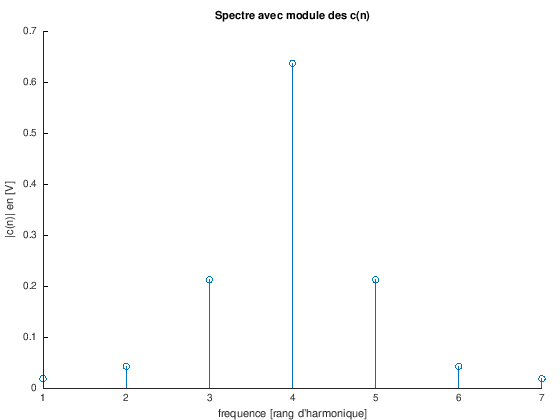

In [3]:
clear all;
n=-3:3;  % on calcule les c(n) de -3 à 3
T0=pi; Te=0.01; t=0:Te:T0;   % vecteur temps
% matrice imaginaire de toutes les vecteurs de base
% un signal par rangée
N = length(t);
M = 1/T0*exp(-i*2*pi*n'*t/T0)*Te;

f_de_t = abs(sin(t)); % signal à décomposer

c_n = M * f_de_t' 
stem(abs(c_n));
xlabel("frequence [rang d'harmonique]");
ylabel("|c(n)| en [V]")
title("Spectre avec module des c(n)");

Chaque rangée de la matrice effectue un produit scalaire avec le signal et donne le coef de décomposition 

$c(n) = <\vec{w_n}, \vec{f}> =  w_n \, . \, {}^T\!\!f$

Le produit matriciel $M.{}^T\!\!f$ donne pour chaque rangée un coefficient $c(n)$ c'est donc les coef. de la SdF.

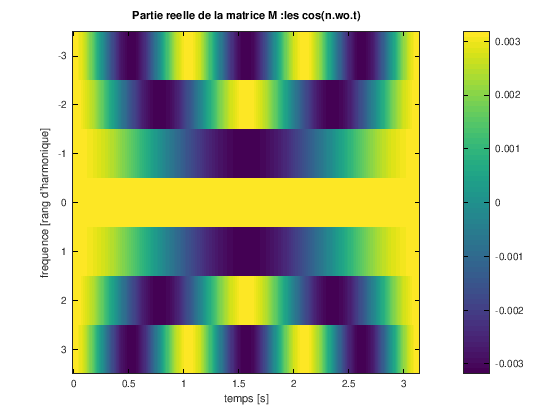

In [7]:
imagesc(t,n,real(M))
colorbar()
xlabel("temps [s]")
ylabel("frequence [rang d'harmonique]")
title("Partie reelle de la matrice M :les cos(n.wo.t)")

Pour reconstruire le signal on cherche la matrice inverse.
Mais si la base est orthogonale on doit avoir $M\,.\,{}^T\overline{M}$ de forme diagonale. La conjuguée de Hilbert (transpose et conjuguée) se calcule avec `M'` sous matlab.

On voit que la base est orthogonale mais pas normée 


la matrice inverse est obtenur en normant M' avec N.M'
M_fois_Minv =

   1   0   0   0   0   0   0
   0   1   0   0   0   0   0
   0   0   1   0   0   0   0
   0   0   0   1   0   0   0
   0   0   0   0   1   0   0
   0   0   0   0   0   1   0
   0   0   0   0   0   0   1



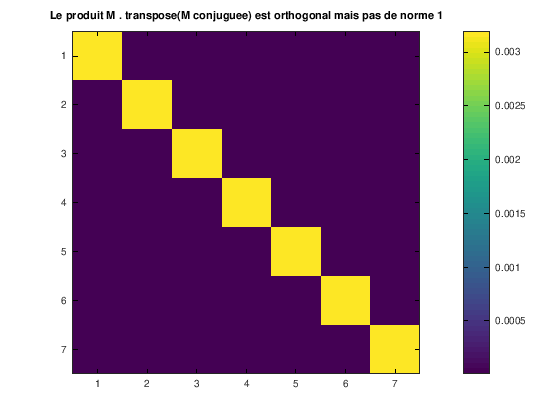

In [116]:
imagesc(real(M*M'));
colorbar();
title("Le produit M . transpose(M conjuguee) est orthogonal mais pas de norme 1")
disp("la matrice inverse est obtenur en normant M' avec N.M'")
approx = @(val) round(val*10)/10;
M_inv = M'*N;
M_fois_Minv = approx(M*M_inv)

Pour reconstruire $f$ à partir des $c(n)$ (SdF inverse ou encore somme partielle de la série),    
on fait une combinaison des rangées de M (les cos et sin) pondérée par $c(n)$ et donc un produit par la gauche de M  :   
$c'.M = f$ où $c'$ doit être un vecteur ligne des coefficient de Fourier.

C'est la reconstruction ou transformée inverse !


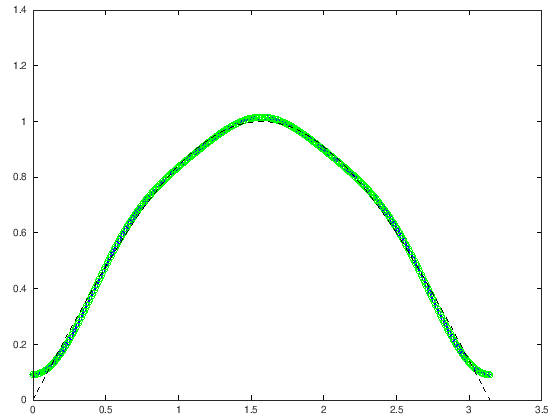

In [117]:
f_rec = c_n'*M*N;
f_inv_c = M_inv*c_n;
plot(t,f_rec,'b+'); hold on;
plot(t,f_inv_c,'go'); 
plot(t,f_de_t,'k--');

Très facile de changer de signal maintenant ! La matrice M et son inverse ne bougent pas...


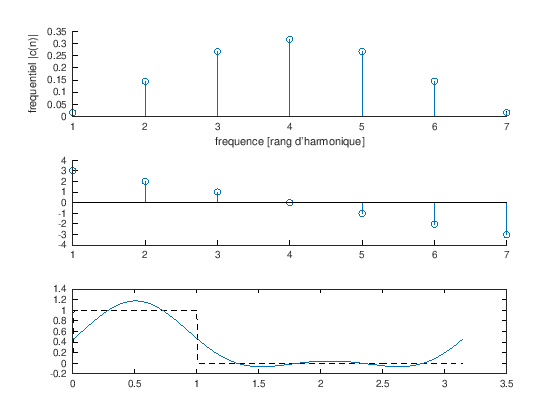

In [124]:
g_de_t =  (t>0) - (t>1);
c_g = M*g_de_t';
g_rec = M_inv * c_g;

subplot(311);
stem(abs(c_g));
ylabel("frequentiel |c(n)|");
xlabel("frequence [rang d'harmonique]")
subplot(312);
ylabel("frequentiel phase de c(n)");
xlabel("frequence [rang d'harmonique]")
stem(arg(c_g));
subplot(313);
title("temporel");
plot(t,g_de_t,'k--'); hold on;
plot(t,g_rec);